In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

def linear_trend_forecast(series, horizon):
    series = np.asarray(series)
    n = len(series)
    X = np.arange(n).reshape(-1,1)        
    y = series

    model = LinearRegression()
    model.fit(X, y)

    X_future = np.arange(n, n+horizon).reshape(-1,1)
    forecast = model.predict(X_future)

    return forecast



[26.28571429 28.57142857 30.85714286]


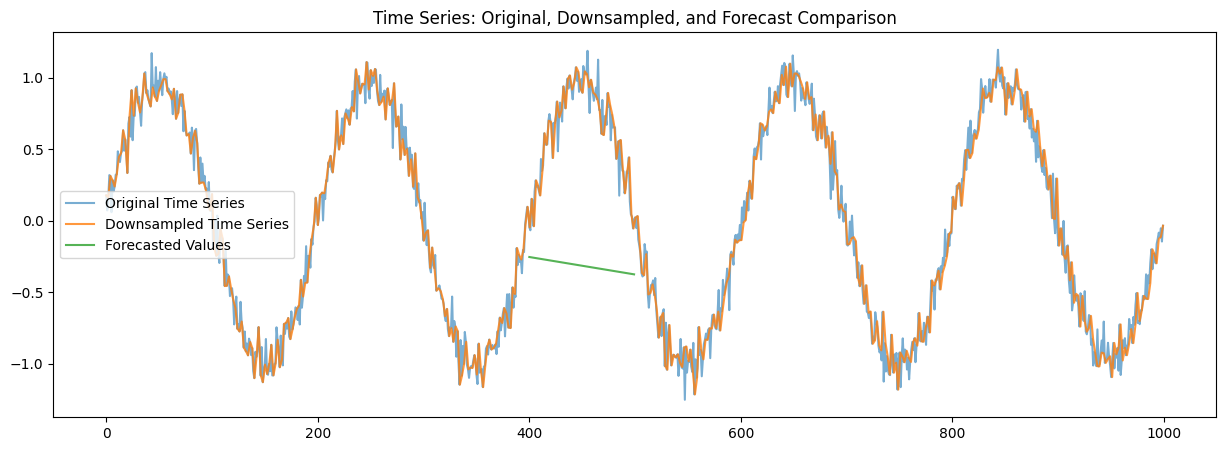

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def downsample_series(series, target_length=500):
    original_length = len(series)
    if original_length <= target_length:
        return np.asarray(series)
    else:
        indices = np.linspace(0, original_length - 1, target_length, dtype=int)
        return np.asarray(series)[indices]

# 线性趋势预测函数
from sklearn.linear_model import LinearRegression
def linear_trend_forecast(series, horizon):
    series = np.asarray(series)
    n = len(series)
    X = np.arange(n).reshape(-1,1)
    y = series
    model = LinearRegression()
    model.fit(X, y)
    X_future = np.arange(n, n+horizon).reshape(-1,1)
    forecast = model.predict(X_future)
    return forecast

# 训练-测试-预测流程
def train_test_forecast(series, train_length=400, horizon=100):
    downsampled = downsample_series(series, target_length=500)
    train = downsampled[:train_length]
    test = downsampled[train_length:train_length+horizon]
    forecast = linear_trend_forecast(train, horizon)
    return downsampled, train, test, forecast

# 生成带噪声的正弦序列
np.random.seed(0)
n_points = 1000
x = np.linspace(0, 10 * np.pi, n_points)
series = np.sin(x) + 0.1 * np.random.randn(n_points)
downsampled, train, test, forecast = train_test_forecast(series)

plt.figure(figsize=(15,5))
plt.plot(series, label='Original Time Series', alpha=0.6)
plt.plot(np.linspace(0, len(series)-1, len(downsampled)), downsampled, label='Downsampled Time Series', alpha=0.8)
# plt.plot(np.arange(400, 500), test, label='Test Set True Values', alpha=0.8)
plt.plot(np.arange(400, 500), forecast, label='Forecasted Values', alpha=0.8)
plt.legend()
plt.title('Time Series: Original, Downsampled, and Forecast Comparison')
plt.show()



# Try Patch TST